In [1]:
import numpy as np
import scipy
import robust_mean_estimate as rl
import importlib as il
from scipy import special
from numpy import linalg as LA
import matplotlib.pyplot as plt
%matplotlib inline
import mpld3
mpld3.enable_notebook()

fsize = 20
fpad = 10
figsize = (8,4)
fontname = 'fantasy'

[10. -5. -4.  2.  0.  0.  0.  0.  0.  0.]
[[  7.34274115  -6.76448844  -6.62162767 ...   0.92839598   9.07812737
   -4.98724829]
 [ 10.29283582 -21.43708922 -12.24712617 ...  -1.80840793   0.20047173
    1.10430953]
 [ 10.2262409   -4.32255032  -4.27833829 ...   4.96925499  -0.92954116
    0.78395471]
 ...
 [  7.3275689   -7.62775155  -4.51955618 ...  -1.15369466  -3.4497017
   -2.70032018]
 [ 11.13985649  -7.36819085  -6.2752146  ...  -1.2817241   -3.01213381
   -2.37778106]
 [  9.44350362 -11.52422261  -2.46601635 ...  -0.25697754  -1.5774246
   -0.10469069]]
Prediction: 4
Prediction: 4
[10. -5. -4.  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.]
[[11.30401042 -4.21682203 -2.71423619 ... -1.24508054  5.23815799
   0.66684795]
 [10.52149961 -2.34216606 -3.28056538 ...  1.0093147   0.68814019
  -0.27855866]
 [11.27786616 -5.38577148 -5.97731897 ...  0.40685803 -0.46081847
  -0.65168388]
 ...
 [ 6.34400804 -8.18411369 -5.41964957 ...  2.5088261  -2.22971346
  -2.16

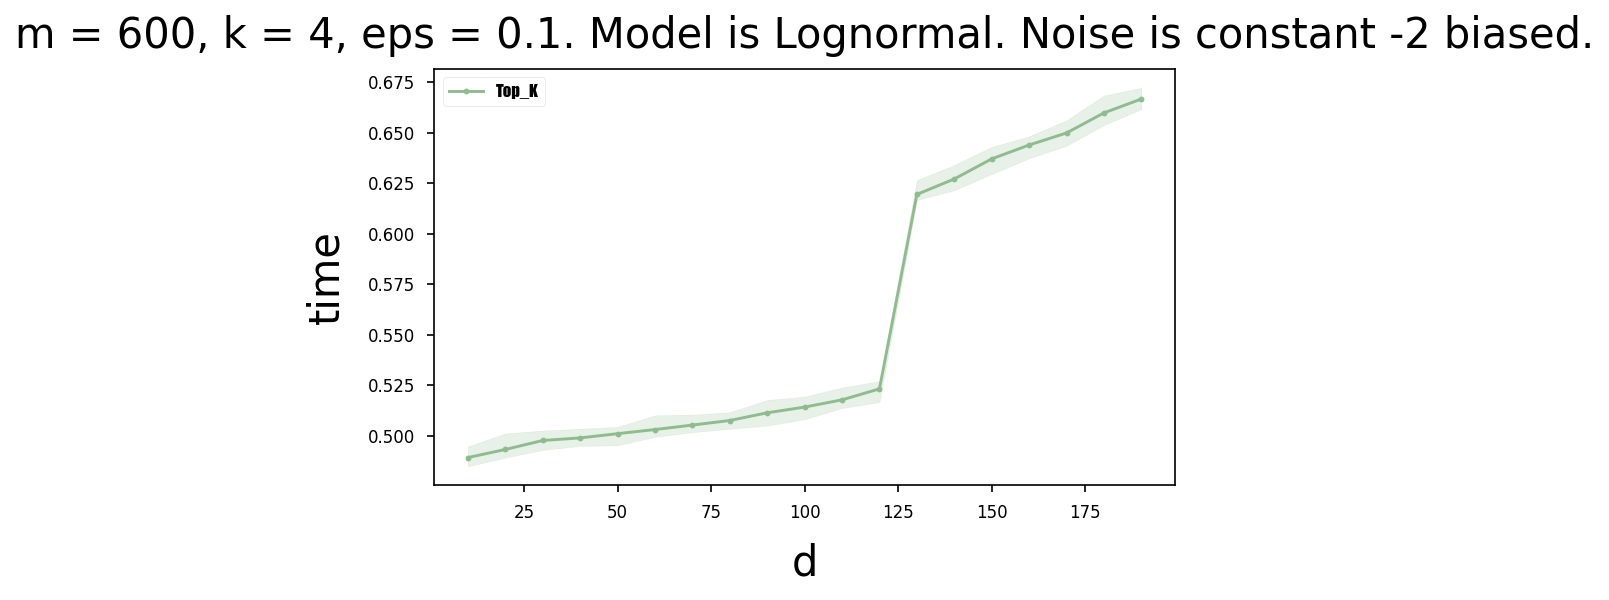

<Figure size 1200x600 with 0 Axes>

In [3]:
"Top_K -- time vs dimention -- Lognormal -- dense biased"

il.reload(rl)

trials = 50

m, k, eps = 600, 4, 0.1
xs = list(np.arange(10, 200, 10))

keys = [rl.Top_K]

model = rl.LognormalModel()
noise_model = rl.DenseNoise(-2)
model_params = rl.Params(m = m, k = k, eps = eps)

inputfilename = 'data/time-vs-dimension-Lognormal.pkl'
outputfilename = 'Figs/time-vs-dimension-Lognormal.pdf'

title = 'm = {m}, k = {k}, eps = {eps}. Model is Lognormal. Noise is constant -2 biased.'.format(m = m, k = k, eps = eps)
xlabel = 'd'
ylabel = 'time'

set_data = rl.load_data(model = model, noise_model = noise_model, params = model_params, loss = rl.err, keys = keys)
set_data.setdata_tofile(filename = inputfilename, xvar_name = 'd', trials = trials, xs = xs)

plot = rl.plot_data(model = model, noise_model = noise_model, params = model_params, loss = rl.err, keys = keys)
plot.plotxy_fromfile_time(outputfilename = outputfilename, filename = inputfilename, title = title, xlabel = xlabel, ylabel = ylabel, figsize = figsize, fsize = fsize, fpad = fpad, xs = xs, fontname = fontname)

[[ 12.98895782  -6.20659599  -2.40755223 ...  -1.32560654   1.30977331
    2.16191283]
 [  8.81546322  -6.01664537  -1.68283547 ...   1.79914826  -1.57609665
   -1.33469945]
 [ 12.07103615  -3.57863536  -9.47817608 ...   1.63321772  -1.11067868
    3.07149909]
 ...
 [  6.87488564  -8.64387426 -10.87828257 ...  -0.51151564  -3.18288169
   -3.52947357]
 [ 10.07512547  -8.03953044  -7.17320204 ...  -6.50722684  -3.5228381
   -3.27132694]
 [  9.3827886   -9.25562603  -3.25670789 ...  -0.91874744  -5.26515046
   -4.32954249]]
Prediction: [0, 1, 2, 3]
Prediction: [0, 1, 2, 3, 7, 13, 16, 22, 34, 44, 45, 56, 59, 61, 65, 67, 68, 75, 81, 84, 85, 88, 91, 96]
[[  8.36096846  -3.91621249  -5.45868029 ...   1.00288338  -1.99710579
   -1.50358937]
 [  8.48500281  -3.95308193  -5.30303202 ...   1.7495724   -1.65560778
   -1.11508091]
 [  8.38195451  -3.74779749  -6.55399397 ...   1.1064046    1.29005031
   -1.50718416]
 ...
 [  6.95380166  -5.79626133  -4.44829774 ...  -4.49154091  -4.51927635
   -3.2

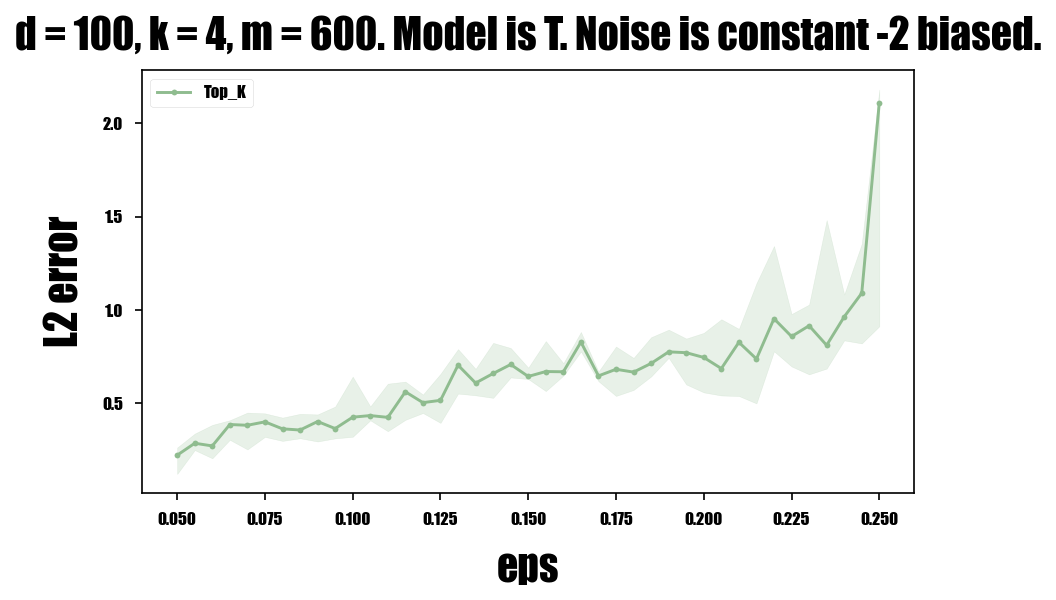

<Figure size 1200x600 with 0 Axes>

In [3]:
"Top_K -- loss vs eps -- T -- dense biased"

il.reload(rl)

trials = 10

d, k, param, m = 100, 4, 2, 600
xs = list(np.arange(0.05, 0.255, 0.005))

keys = [rl.Top_K]

model = rl.ParetoModel()
noise_model = rl.DenseNoise(-2)
model_params = rl.Params(d = d, k = k, param = param, m = m)

inputfilename = 'data/loss-vs-eps-T.pkl'
outputfilename = 'Figs/loss-vs-eps-T.pdf'

title = 'd = {d}, k = {k}, m = {m}. Model is T. Noise is constant -2 biased.'.format(d = d, k = k, m = m)
xlabel = 'eps'
ylabel = 'L2 error'

set_data = rl.load_data(model = model, noise_model = noise_model, params = model_params, loss = rl.err, keys = keys)
set_data.setdata_tofile(filename = inputfilename, xvar_name = 'eps', trials = trials, xs = xs)

plot = rl.plot_data(model = model, noise_model = noise_model, params = model_params, loss = rl.err, keys = keys)
plot.plotxy_fromfile(outputfilename = outputfilename, filename = inputfilename, title = title, xlabel = xlabel, ylabel = ylabel, figsize = figsize, fsize = fsize, fpad = fpad, xs = xs, fontname = fontname)

In [ ]:
"loss vs eps -- T -- dense biased"

il.reload(rl)

trials = 50

m, k, d, param = 3000, 4, 100, 2.74
xs = list(np.arange(0.01, 0.21, 0.01))

keys = [rl.Oracle, rl.Top_K, rl.Topk_GD, rl.GD_nonsparse]

model = rl.TModel()
noise_model = rl.DenseNoise(-2)
model_params = rl.Params(m = m, k = k, d = d, param = param)

inputfilename = 'Data/loss-vs-eps-T.pkl'
outputfilename = 'Figs/loss-vs-eps-T.pdf'

title = 'Student t'
xlabel = 'eps'
ylabel = 'L2 error'

set_data = rl.load_data(model = model, noise_model = noise_model, params = model_params, loss = rl.err, keys = keys)
set_data.setdata_tofile(filename = inputfilename, xvar_name = 'eps', trials = trials, xs = xs)

plot = rl.plot_data(model = model, noise_model = noise_model, params = model_params, loss = rl.err, keys = keys)
plot.plotxy_fromfile_time(outputfilename = outputfilename, filename = inputfilename, title = title, xlabel = xlabel, ylabel = ylabel, figsize = figsize, fsize = fsize, fpad = fpad, xs = xs, fontname = fontname)